# Noise Analysis Test

### Imports

In [1]:
from noise import noise #import the noise class
import numpy as np
import matplotlib.pyplot as plt


### Load test data


In [2]:
traces = np.load('traces.npy')

### Create noise object


In [3]:
sampleRate = 625e3 #define sample rate
channels = [ 'PCS1' , 'PES1' , 'PFS1' , 'PAS2' , 'PBS2' , 'PES2' , 'PDS2' ] #define the channel names
g124_noise = noise(traces, sampleRate, channels) #initialize a noise object
g124_noise.set_name('G124 SLAC Run 37 Pulse Tube On') #use the set_name method to name the object


####  Lets check that we can't create and instance of noise if the number of channels doesn't match the number of channel names

In [4]:
chan = ['a', 'b']
fake_noise = noise(traces, sampleRate, chan)

ValueError: the number of channel names must mach the number of channes in traces!

#### Good, it won't let us create the object!

### Calculate the PSD and corrCoeff

In [5]:
g124_noise.calculate_PSD()
g124_noise.calculate_corrCoeff()

### Test plotting of PSD and corrCoeff

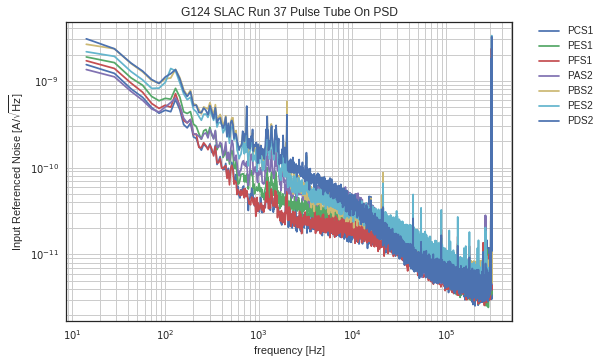

In [6]:
g124_noise.plot_PSD(lgc_overlay=True, lgcSave=True, savePath='example_Figs/')


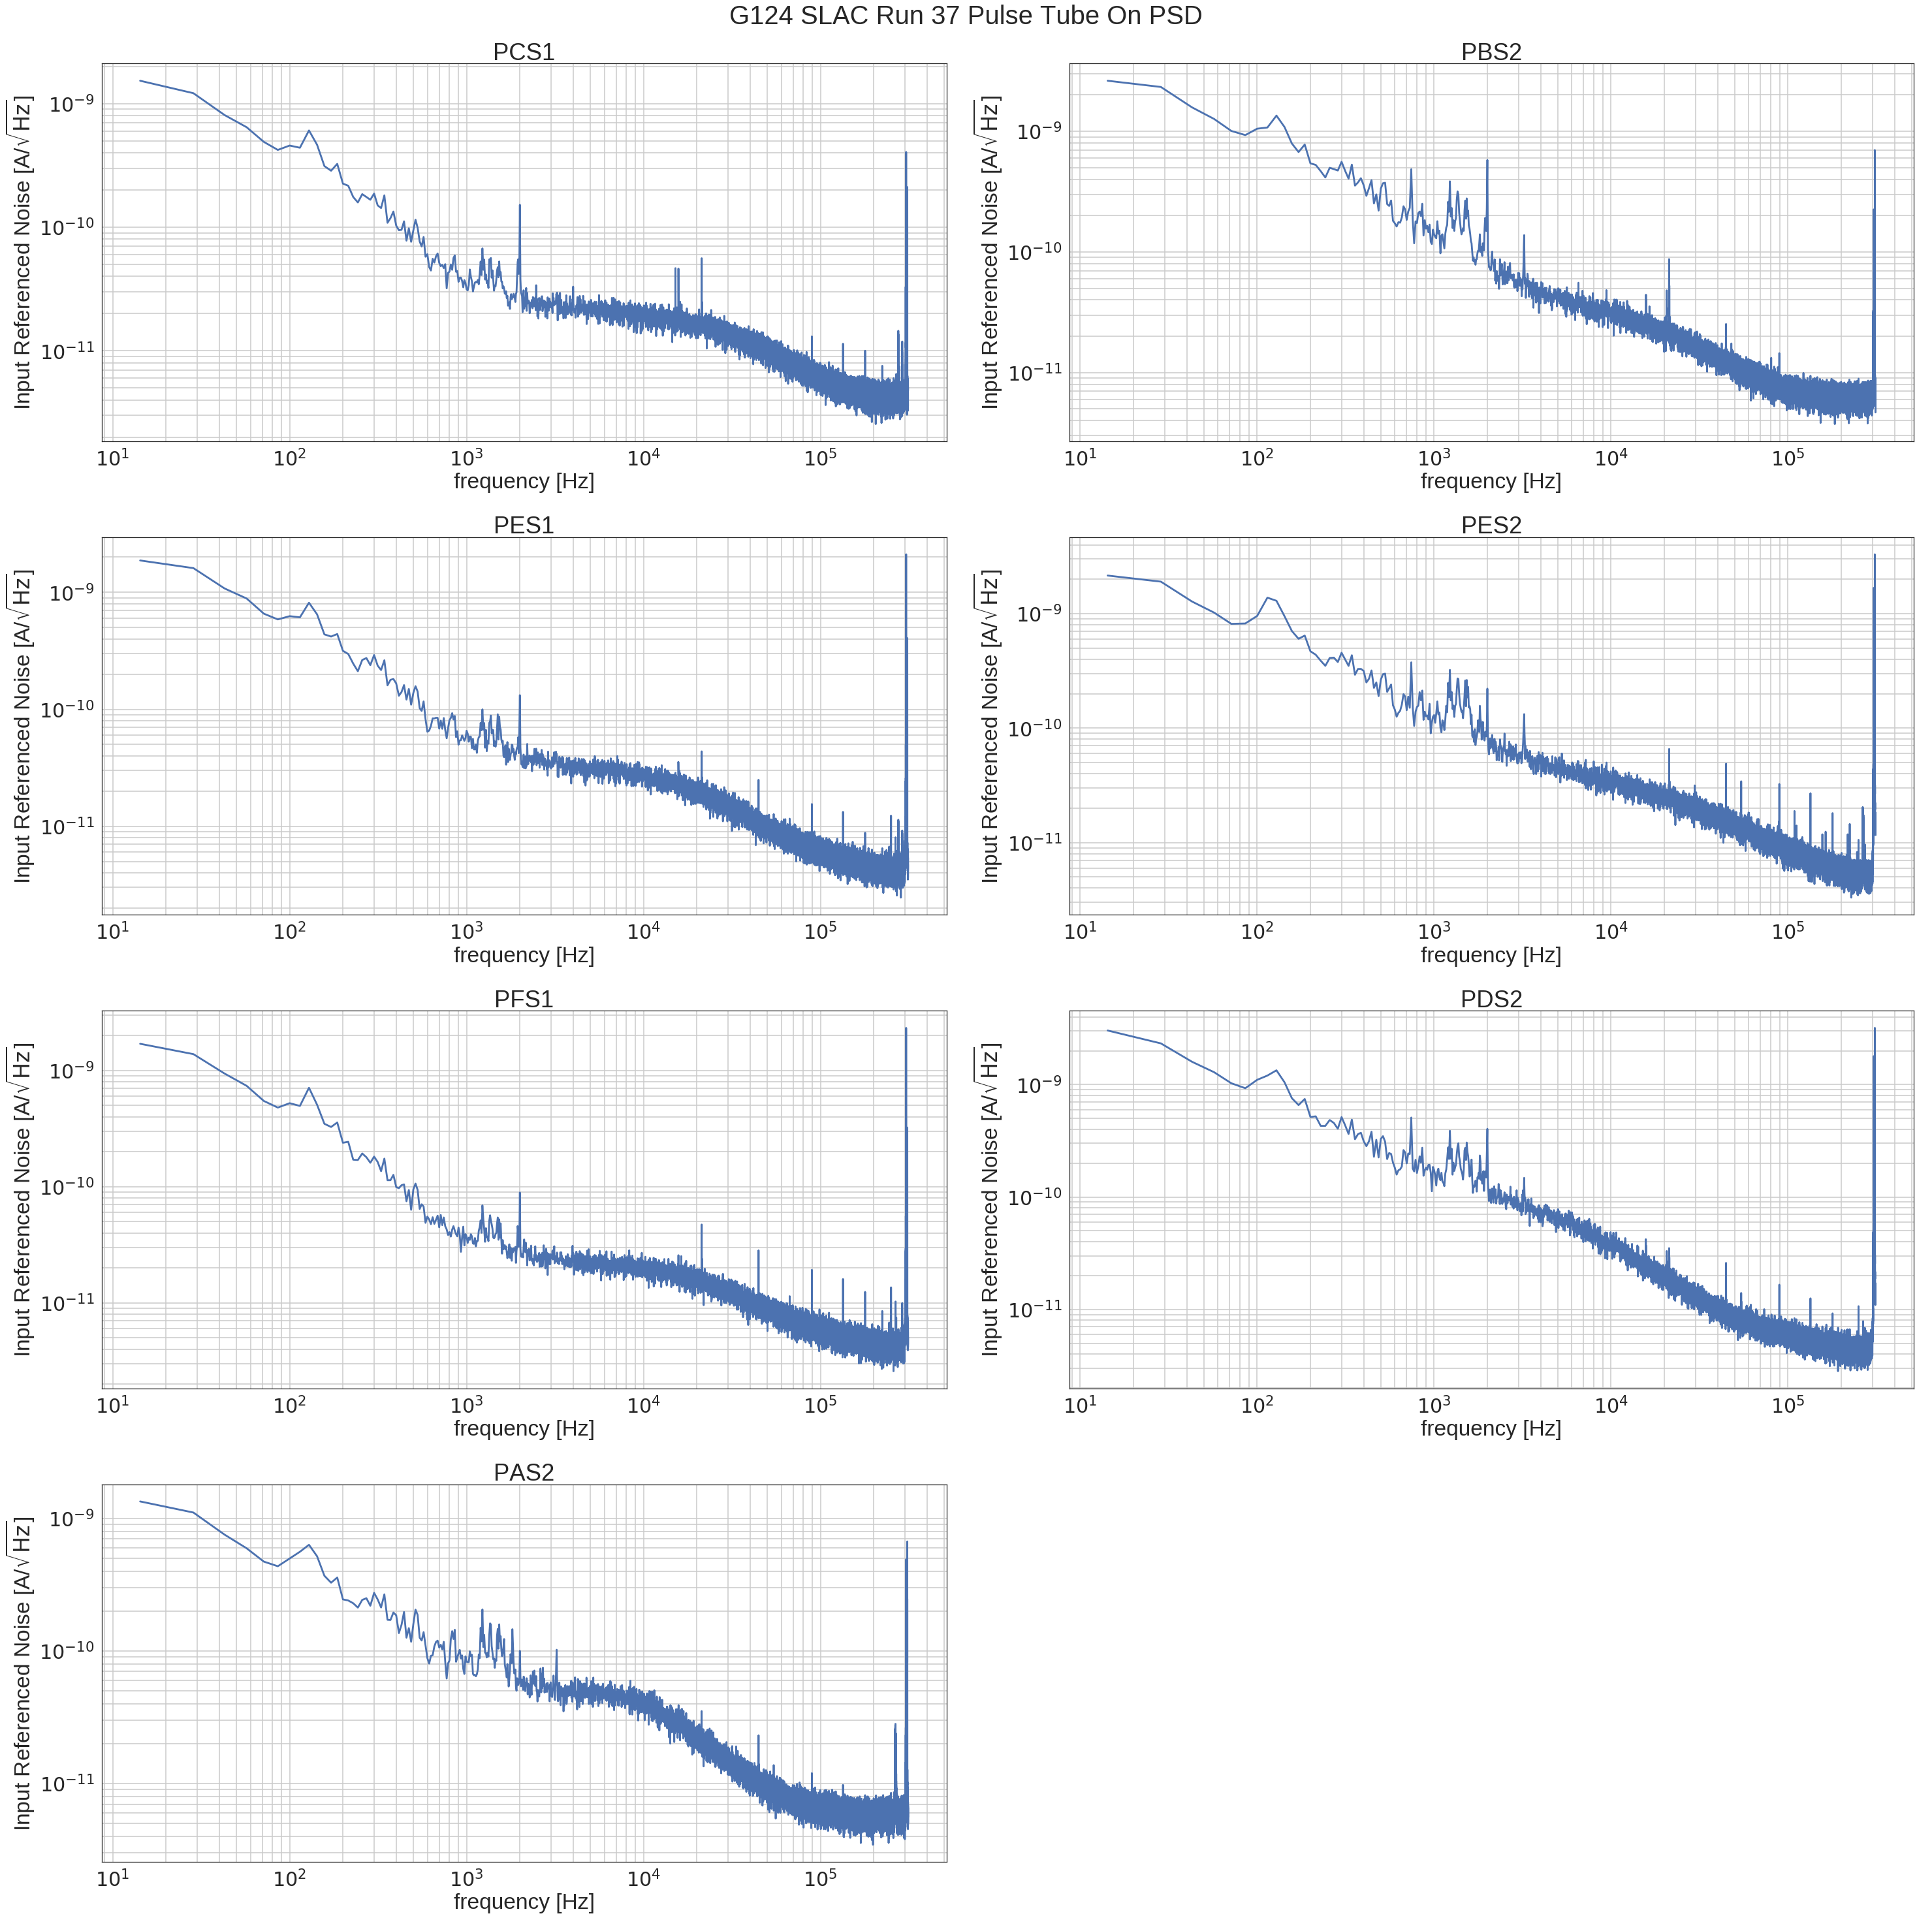

In [7]:
g124_noise.plot_PSD(lgc_overlay=False, lgcSave=True, savePath='example_Figs/')

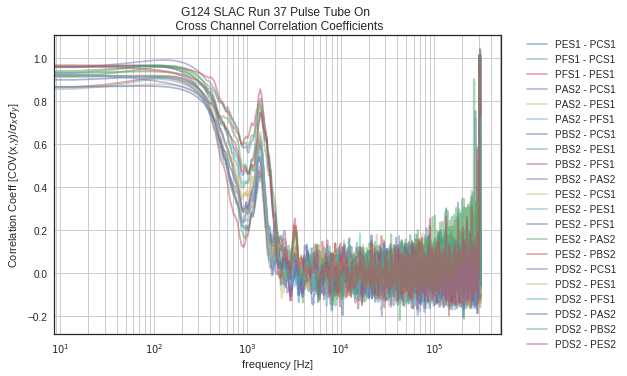

In [8]:
g124_noise.plot_corrCoeff(lgcSave=True, savePath='example_Figs/')

### Test error checking on plots. Try to plot something before we calculate it

In [9]:
g124_noise.plot_CSD(whichCSD=['66','26'])

Must calculate the CSD first


## Calculate the cross channel power spectral density (CSD)

In [10]:
g124_noise.calculate_CSD()

## Plot a few CSDs

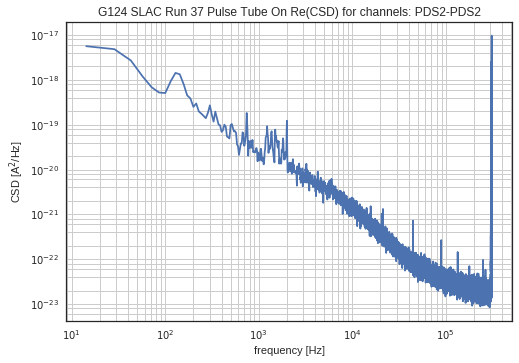

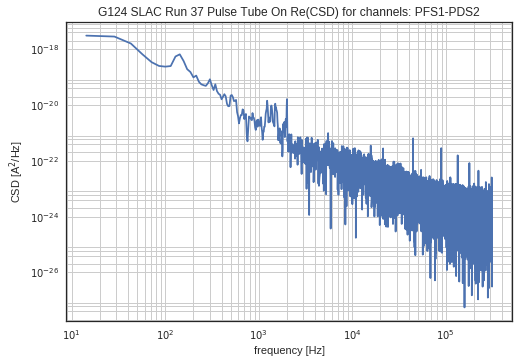

In [11]:
g124_noise.plot_CSD(whichCSD=['66','26'],lgcSave=True, savePath='example_Figs/')

### Try to plot a CSD for a non existant channel

In [12]:
g124_noise.plot_CSD(whichCSD=['68'])

index out of range


### Try to save a figure with a bad path

Invalid save path. Figure not saved


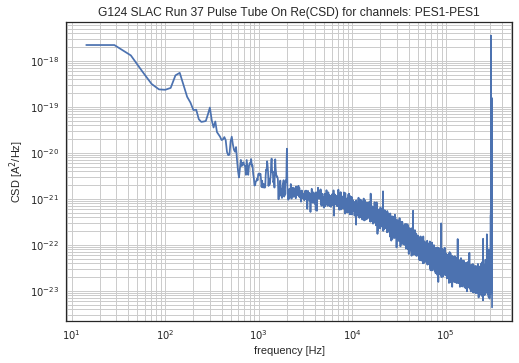

In [13]:
g124_noise.plot_CSD(whichCSD=['11'],lgcSave=True, savePath = 'yay/python/is/great')

## Let's test the de-correlation fitting for a subset of the frequencies

In [18]:
g124_noise.calculate_deCorrelated_noise(freq_range=[0,1500])


 Fitting frequency bin  0  out of  1500

 ======  0.1 percent Done ================ 


/galbadata/analysis/packages/anaconda3/lib/python3.6/site-packages/scipy/optimize/_lsq/least_squares.py:111: UserWarning: `ftol` is too low, setting to machine epsilon 2.220446049250313e-16.
  warn(message.format("`ftol`", EPS))
/galbadata/analysis/packages/anaconda3/lib/python3.6/site-packages/scipy/optimize/_lsq/least_squares.py:114: UserWarning: `xtol` is too low, setting to machine epsilon 2.220446049250313e-16.
  warn(message.format("`xtol`", EPS))



 Fitting frequency bin  50  out of  1500

 ======  3.4000000000000004 percent Done ================ 

 Fitting frequency bin  100  out of  1500

 ======  6.7 percent Done ================ 

 Fitting frequency bin  150  out of  1500

 ======  10.100000000000001 percent Done ================ 

 Fitting frequency bin  200  out of  1500

 ======  13.4 percent Done ================ 

 Fitting frequency bin  250  out of  1500

 ======  16.7 percent Done ================ 

 Fitting frequency bin  300  out of  1500

 ======  20.1 percent Done ================ 

 Fitting frequency bin  350  out of  1500

 ======  23.400000000000002 percent Done ================ 

 Fitting frequency bin  400  out of  1500

 ======  26.700000000000003 percent Done ================ 

 Fitting frequency bin  450  out of  1500

 ======  30.099999999999998 percent Done ================ 

 Fitting frequency bin  500  out of  1500

 ======  33.4 percent Done ================ 

 Fitting frequency bin  550  out of  1500

KeyboardInterrupt: 

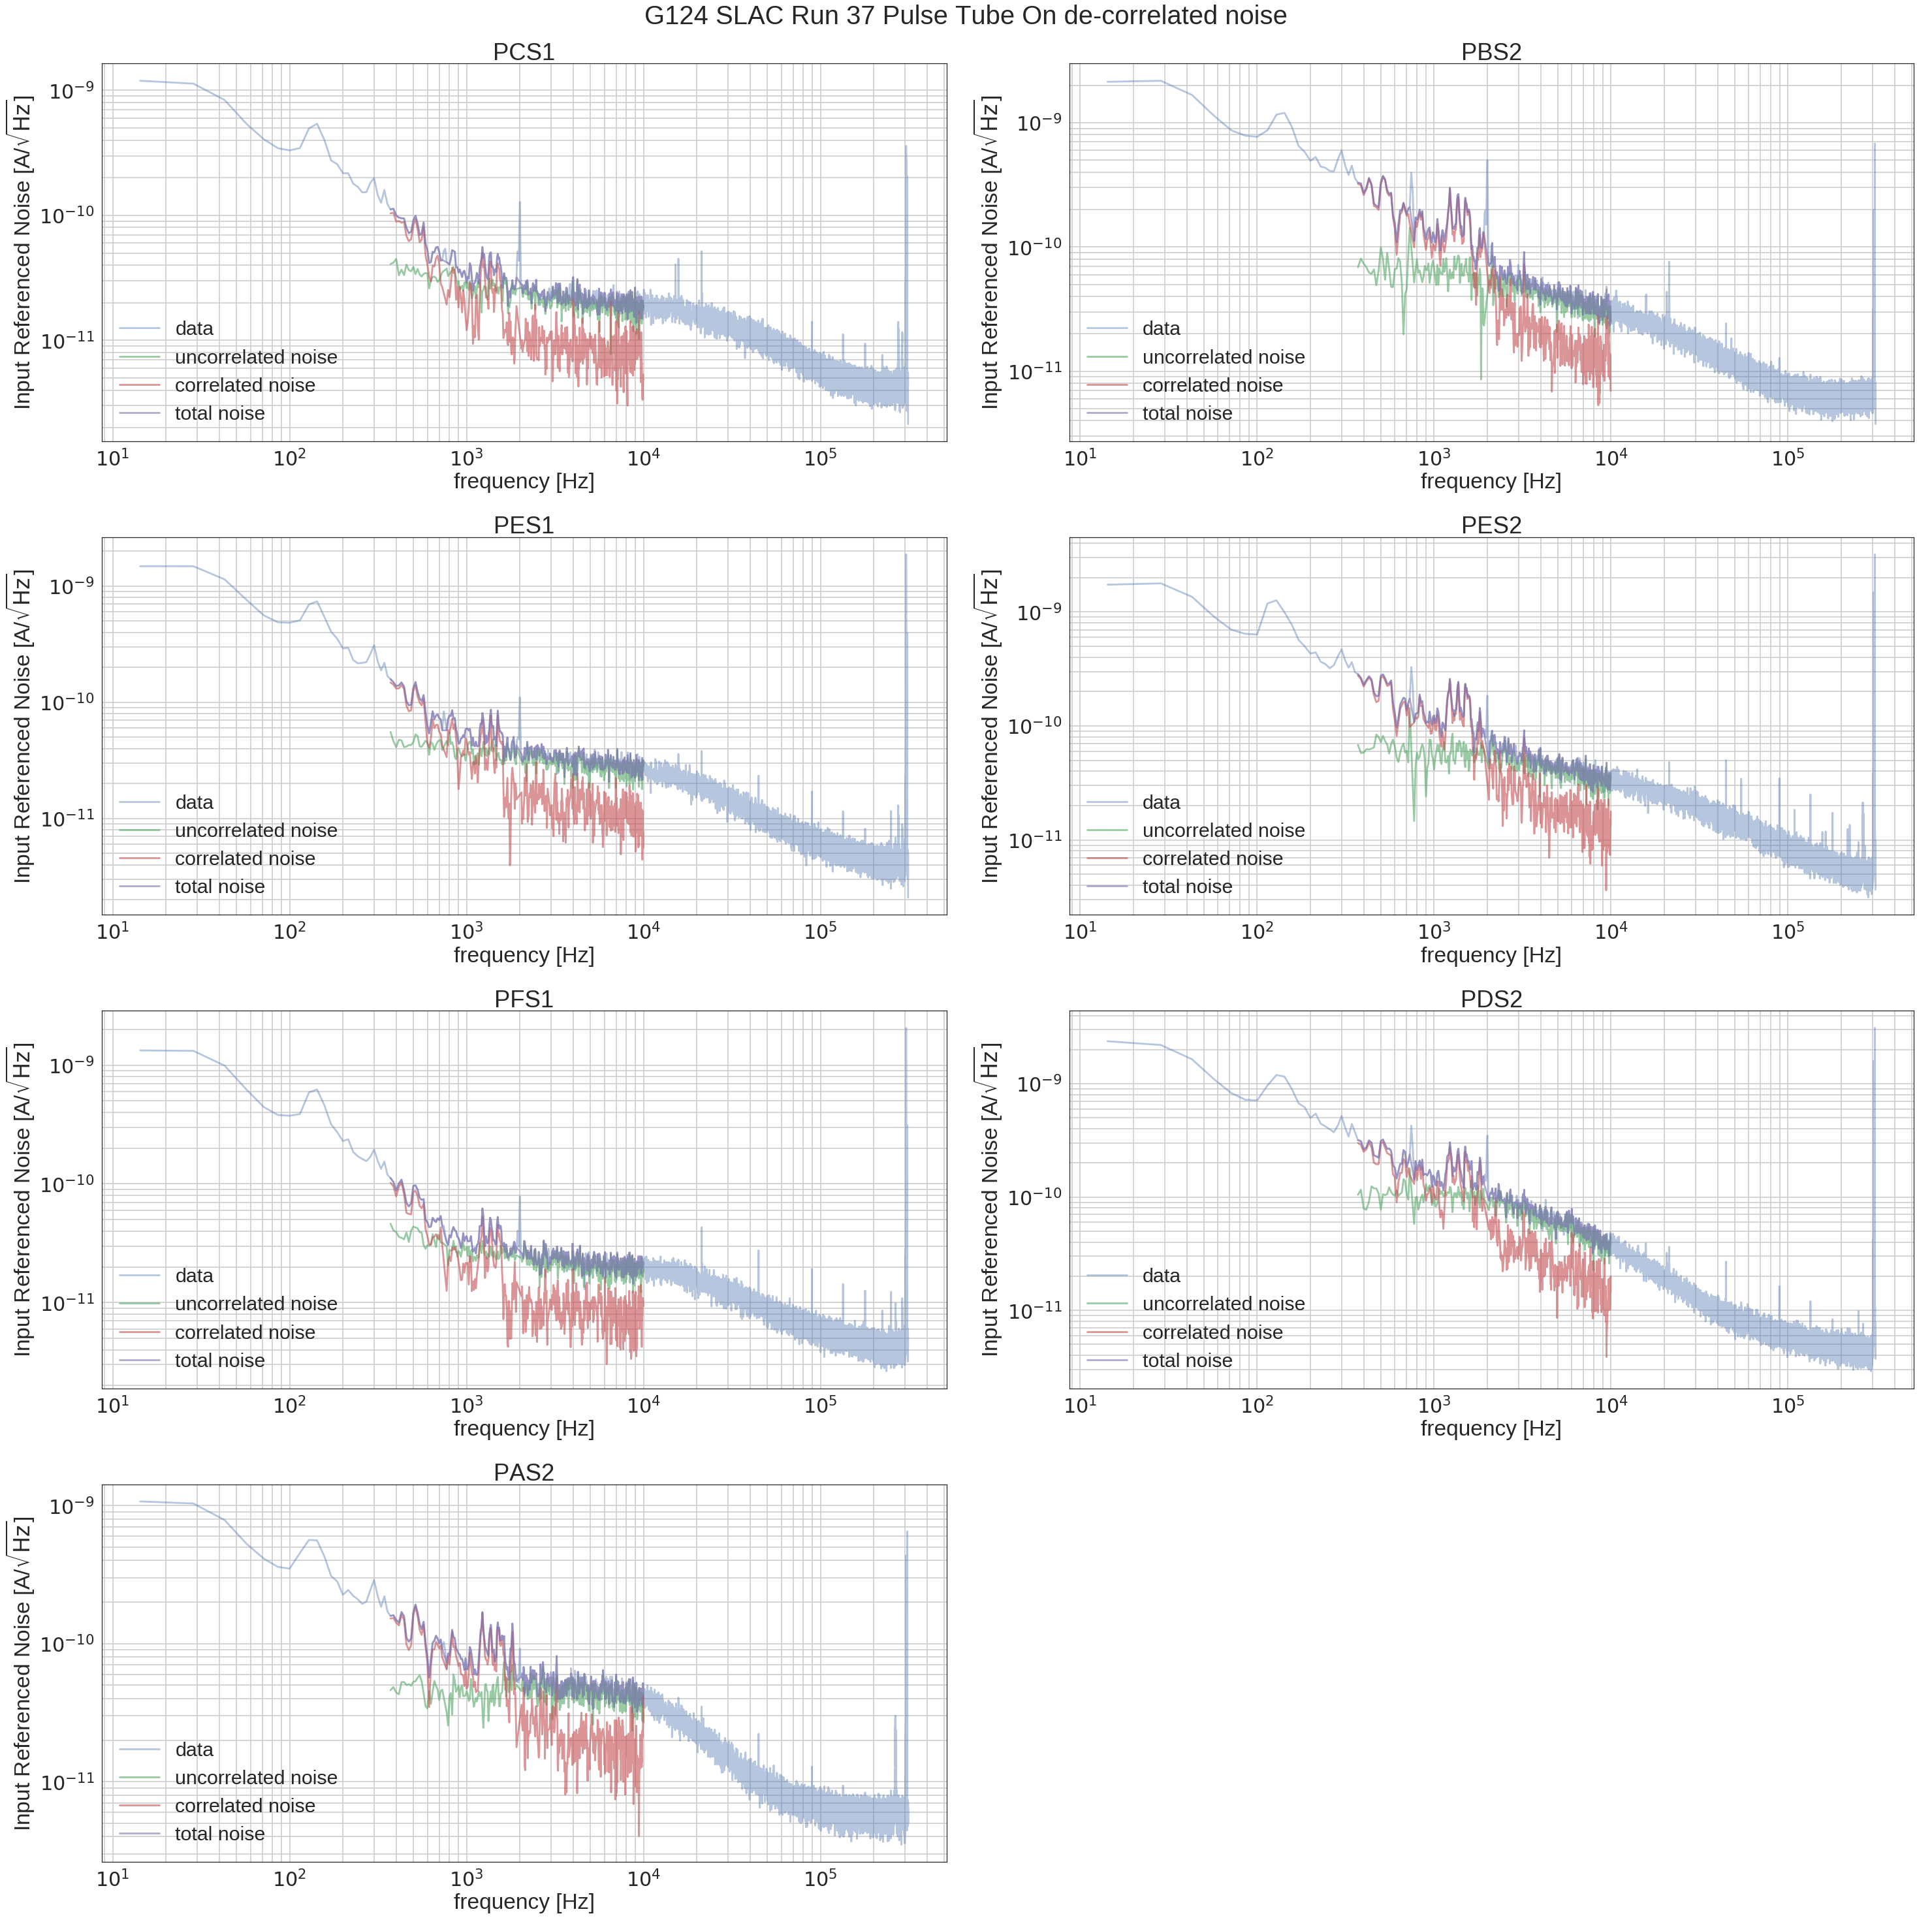

In [16]:
g124_noise.plot_deCorrelatedNoise(lgcCorrelated=True,lgcSum = True, lgcSave=True, savePath='example_Figs/' )

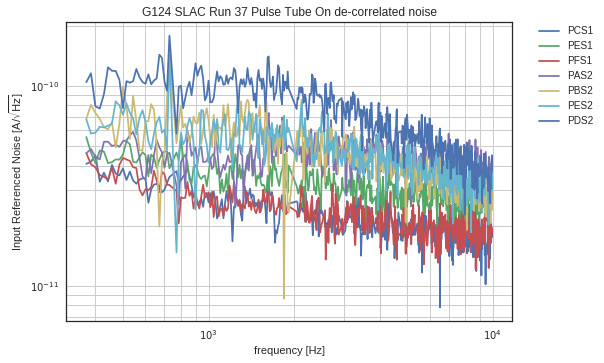

In [17]:
g124_noise.plot_deCorrelatedNoise(lgc_overlay = True, lgcSave=True, savePath='example_Figs/')

In [24]:
plt.plot(np.arange(5),np.arange(5))

plt.savefig('dumbfig')
